# Topic Modelling of News Headlines using Latent Semantic Analysis (LSA)
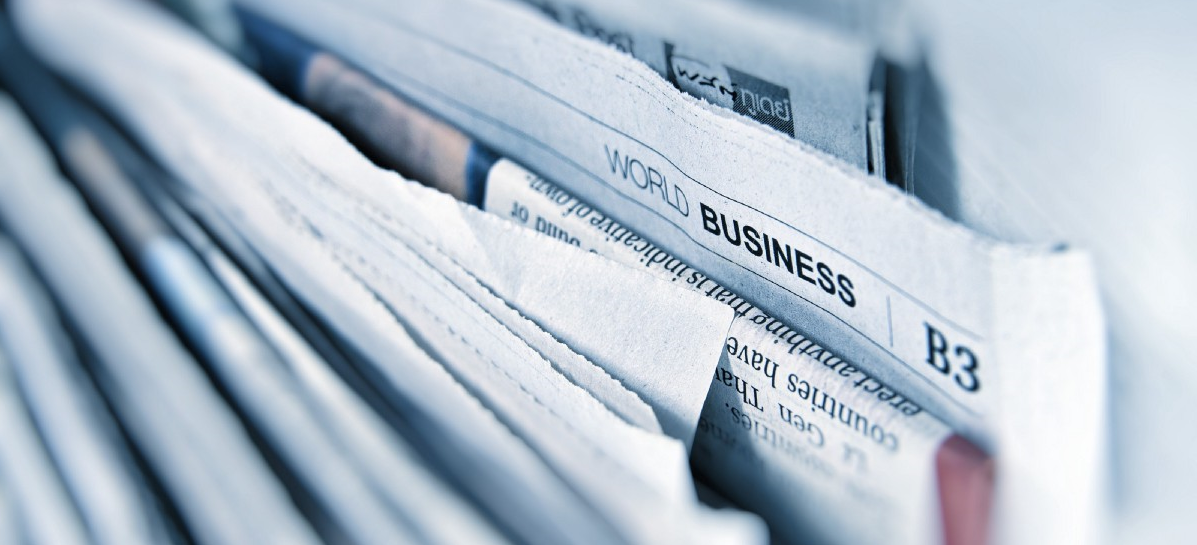

## Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords 
from nltk import word_tokenize,sent_tokenize 
from nltk.stem import WordNetLemmatizer  
from sklearn.decomposition import TruncatedSVD

stop_words=set(nltk.corpus.stopwords.words('english'))

# Reading the Dataset

In [2]:
data_raw = pd.read_csv('abcnews-date-text.csv')

In [3]:
data_raw.head(10)

publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers
5      20030219                  ambitious olsson wins triple jump
6      20030219         antic delighted with record breaking barca
7      20030219  aussie qualifier stosur wastes four memphis match
8      20030219       aust addresses un security council over iraq
9      20030219         australia is locked into war timetable opp

In [4]:
data_raw.columns

Index(['publish_date', 'headline_text'], dtype='object')

# Data Cleaning

<AxesSubplot:>

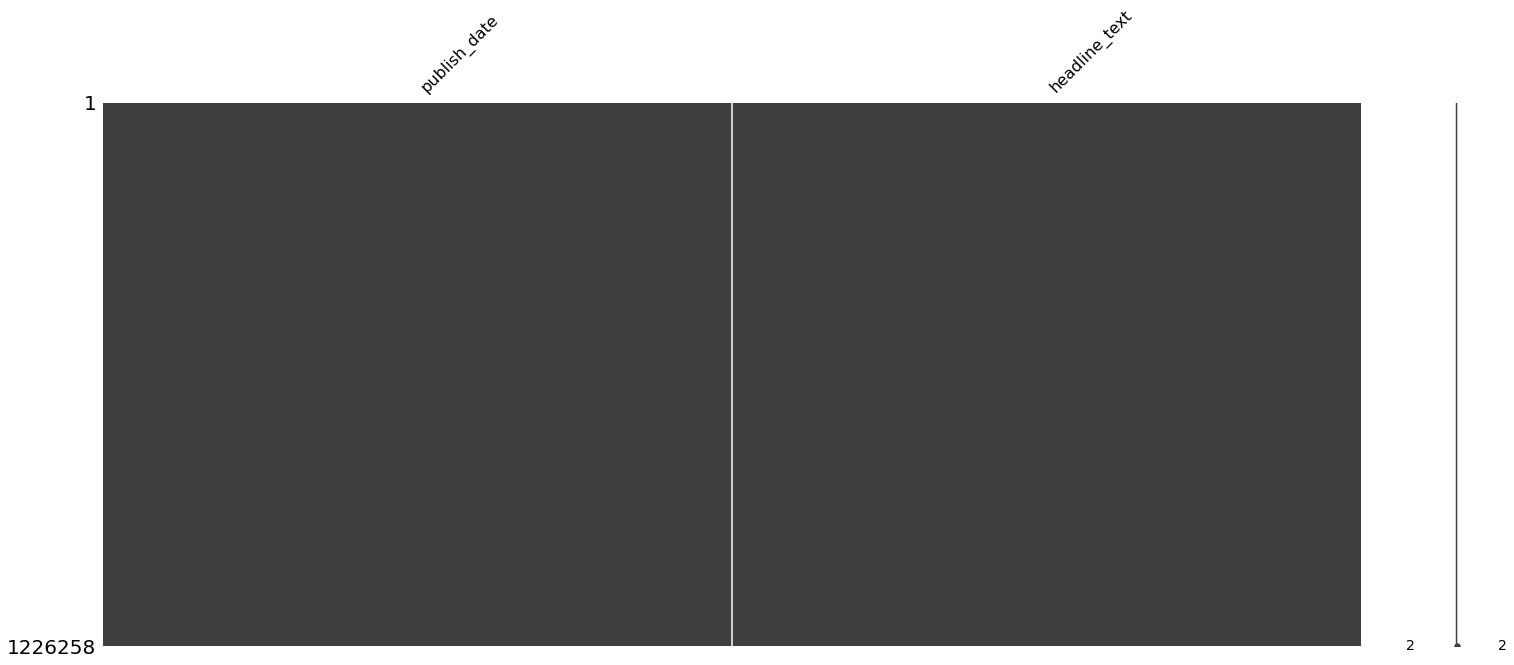

In [5]:
import missingno as m
m.matrix(data_raw)

In [6]:
data_raw = data_raw.drop(columns='publish_date')

# Removing Integer numbers from dataset

In [7]:
data_raw['headline_text'] = data_raw['headline_text'].str.replace('\d+', '')

# Tokenization and Lemmatization

In [8]:
def text_cleaning(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

# Making a new dataframe to store

In [9]:
new = pd.DataFrame()

# Storing the cleaned text

In [10]:
new['cleaned_text']=data_raw['headline_text'].apply(text_cleaning)

In [11]:
new

cleaned_text
0                   decides community broadcasting licence
1                       fire witness must aware defamation
2                    call infrastructure protection summit
3                                   staff aust strike rise
4                       strike affect australian traveller
...                                                    ...
1226253                   reader learned looking back year
1226254                        south african variant covid
1226255         victoria coronavirus restriction mean year
1226256              whats life like american doctor covid
1226257  woman shed canberra reskilling unemployed pand...

[1226258 rows x 1 columns]

# Adding the clean text into raw_dataset

In [12]:
data_raw['Cleaned_text'] = new['cleaned_text']


In [13]:
data_raw.head()

headline_text  \
0  aba decides against community broadcasting lic...   
1     act fire witnesses must be aware of defamation   
2     a g calls for infrastructure protection summit   
3           air nz staff in aust strike for pay rise   
4      air nz strike to affect australian travellers   

                             Cleaned_text  
0  decides community broadcasting licence  
1      fire witness must aware defamation  
2   call infrastructure protection summit  
3                  staff aust strike rise  
4      strike affect australian traveller

# TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect =TfidfVectorizer(stop_words=stop_words)

# Fitting the cleaned text into TF-IDF

In [15]:
vect_text=vect.fit_transform(new['cleaned_text'])

# Got feature names from TF-IDF

In [16]:
print(vect.get_feature_names())

['aaa', 'aaahhh', 'aacc', 'aaco', 'aacos', 'aacta', 'aactas', 'aadhaar', 'aadmi', 'aads', 'aagaard', 'aagard', 'aalto', 'aamer', 'aamers', 'aami', 'aamodt', 'aandahl', 'aant', 'aapa', 'aaps', 'aapt', 'aaradhna', 'aardman', 'aardvark', 'aare', 'aargau', 'aarli', 'aaron', 'aaronpaul', 'aarwun', 'aba', 'abaaoud', 'ababa', 'aback', 'abacus', 'abadi', 'abadoned', 'abal', 'abalone', 'abalonve', 'abama', 'abandon', 'abandonded', 'abandoned', 'abandong', 'abandoning', 'abandonment', 'abandonned', 'abare', 'abares', 'abate', 'abated', 'abatement', 'abates', 'abating', 'abattoi', 'abattoir', 'abattor', 'abb', 'abba', 'abbado', 'abbas', 'abbass', 'abbatoir', 'abbatoirs', 'abbattoir', 'abbattoirs', 'abbe', 'abberton', 'abbertons', 'abbexation', 'abbey', 'abbiati', 'abbie', 'abboott', 'abbortford', 'abbot', 'abbotpoint', 'abbotsbury', 'abbotsford', 'abbotsleigh', 'abbott', 'abbottcarr', 'abbottlands', 'abbotts', 'abbottsays', 'abboud', 'abbreviation', 'abby', 'abc', 'abcc', 'abccs', 'abcde', 'abcmy

In [17]:
vect_text.shape

(1226258, 87811)

In [18]:
type(vect_text)

scipy.sparse.csr.csr_matrix

# Headlines Before Cleaning

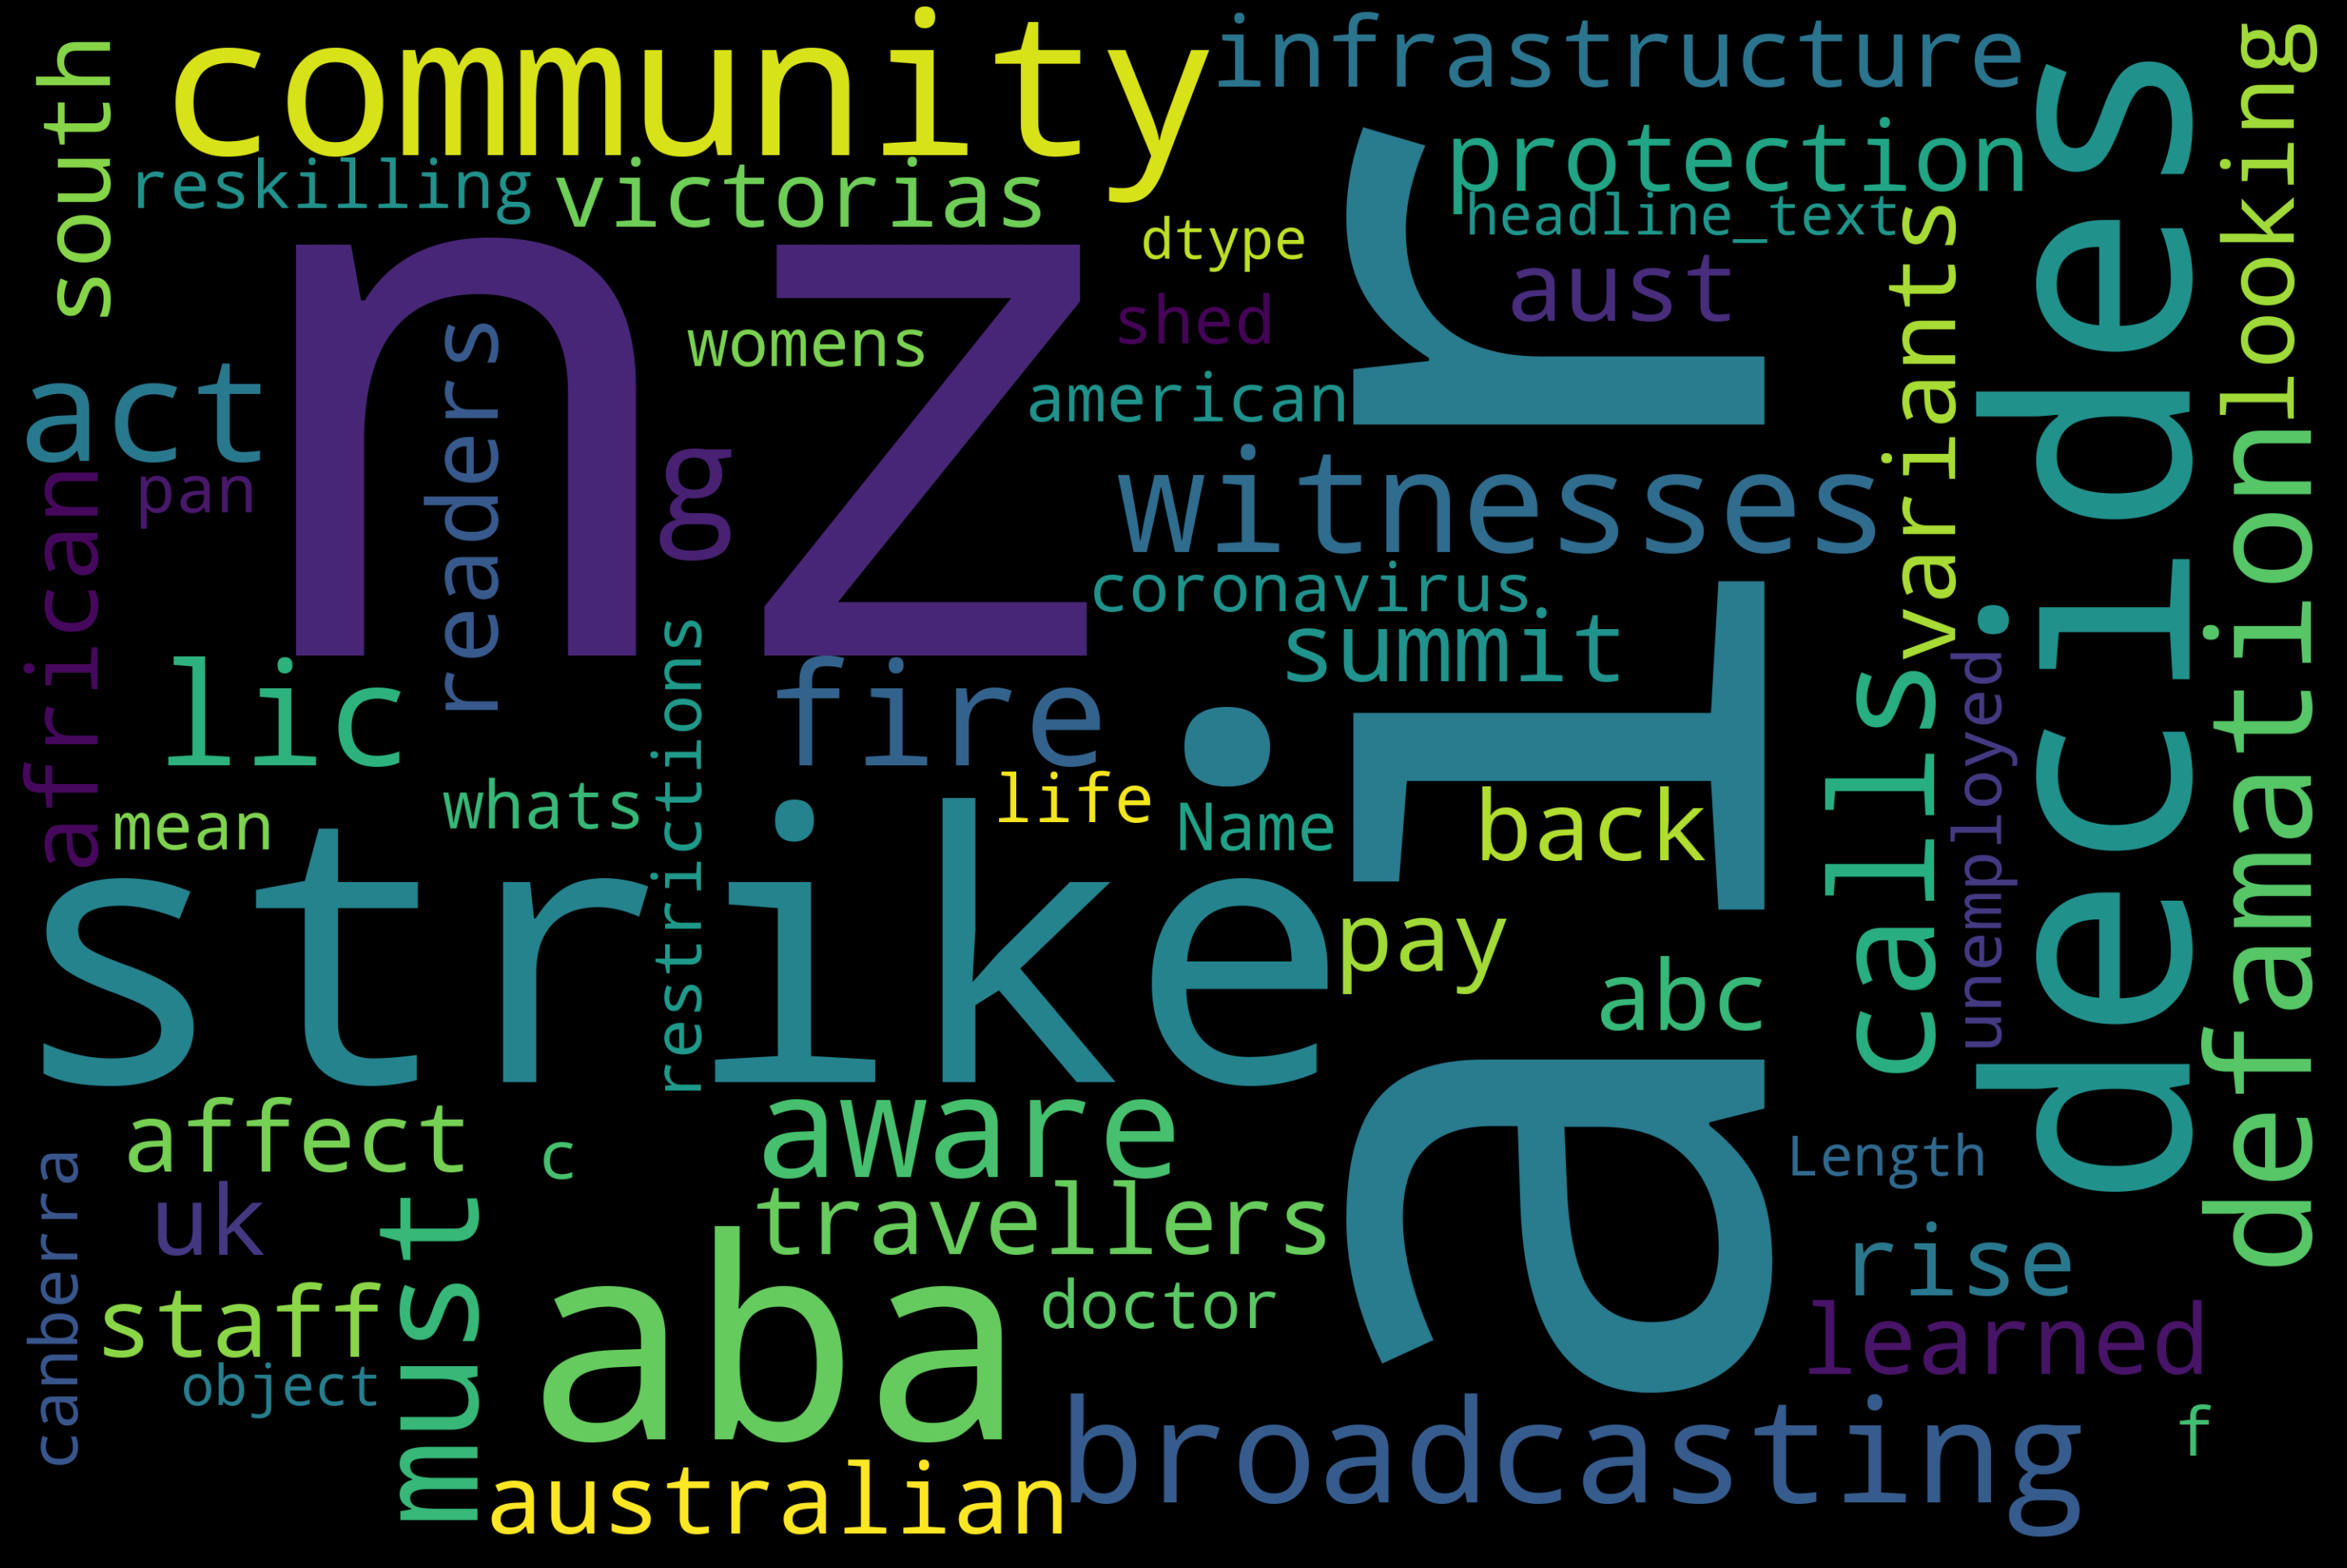

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data_raw.headline_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Headlines After Cleaning

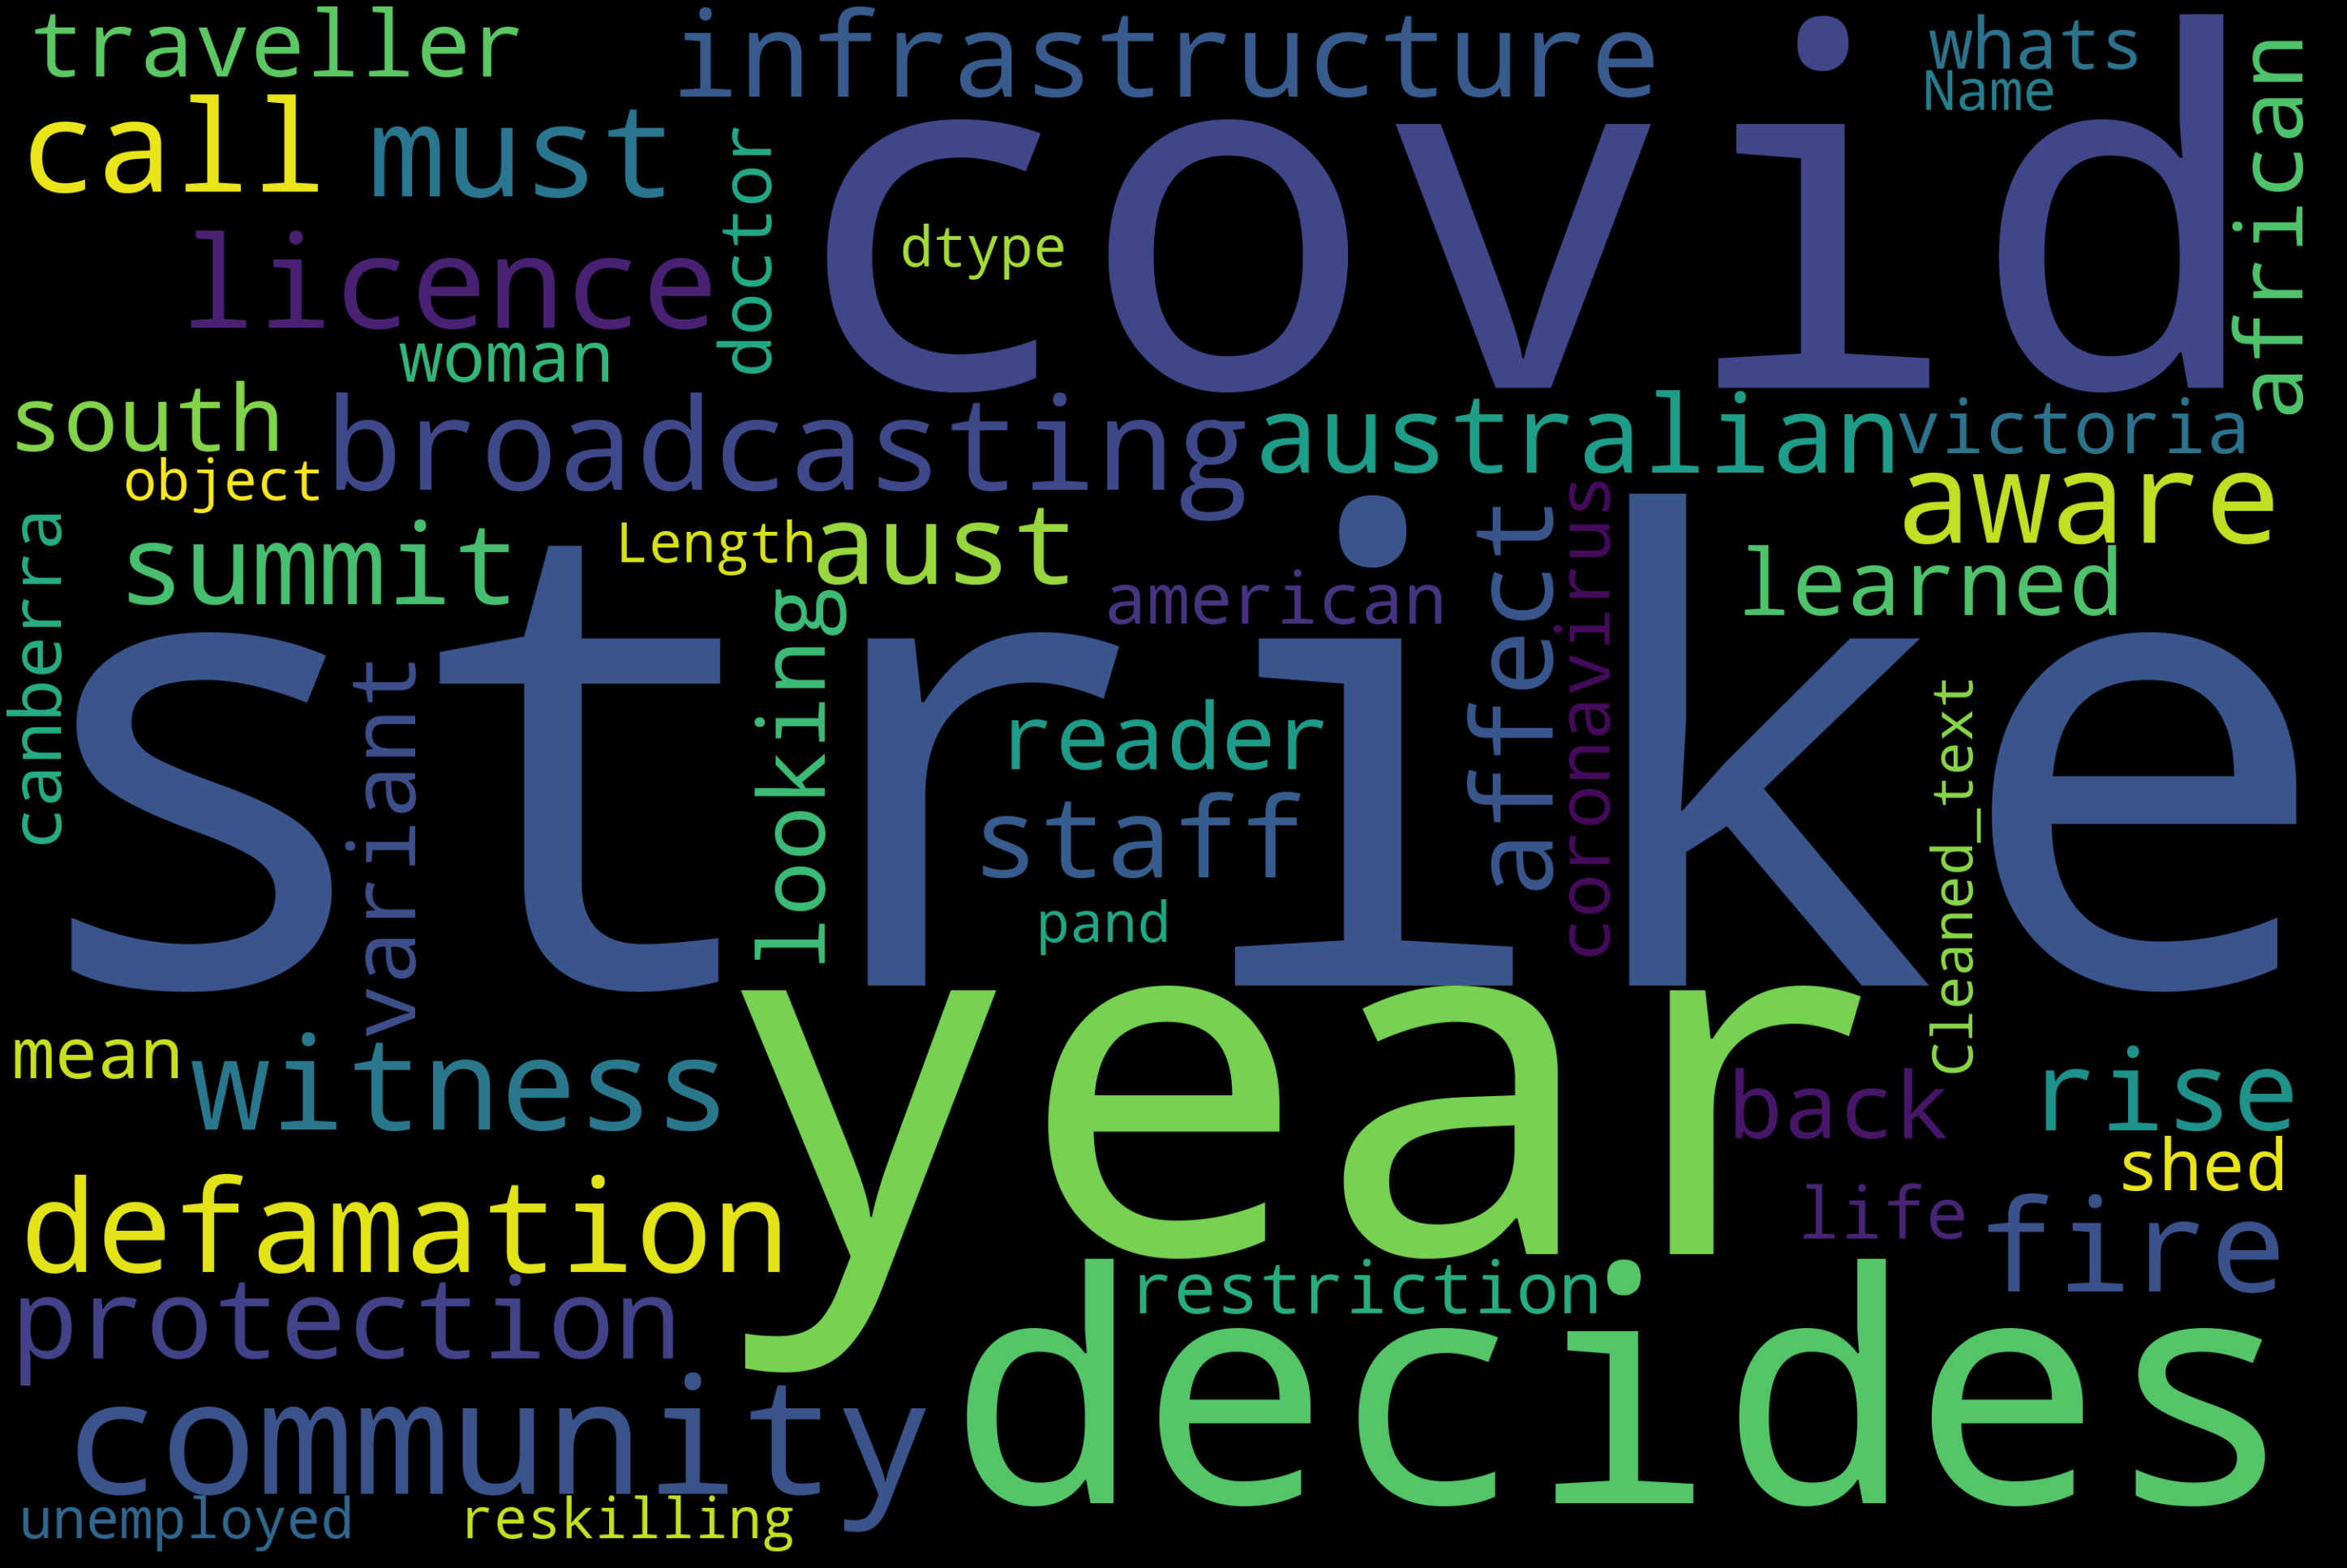

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data_raw.Cleaned_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Topic Modelling

# LSA - Latent Semantic Analysis

In [23]:
lsa_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

# Top LSA values

In [24]:
lsa_top[0]

array([ 0.01050666, -0.01669124, -0.0036634 , -0.00763537, -0.00100312,
       -0.001572  ,  0.00099303, -0.00120925, -0.00202983,  0.00338961,
        0.00083124, -0.00018611, -0.0038339 ,  0.0003366 ,  0.00021566,
        0.00119172,  0.00171326,  0.00141808,  0.00211307,  0.00902132])

In [25]:
names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]

<BarContainer object of 20 artists>

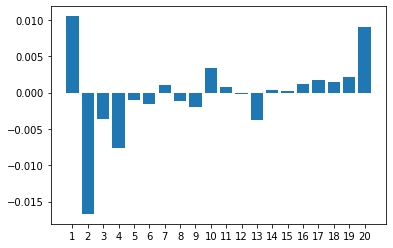

In [26]:
import matplotlib.pyplot as plt
plt.bar(names,lsa_top[0])

In [27]:
lsa_top.shape

(1226258, 20)

In [28]:
lsa_top[0].sort()

In [29]:
l=lsa_top[0]
print("Top LSA Values : ")
for i,topic in enumerate(l):
    print("Topic ",i+1," : ",topic*100)

Top LSA Values : 
Topic  1  :  -1.6691236840237336
Topic  2  :  -0.763537158152235
Topic  3  :  -0.3833900560017347
Topic  4  :  -0.36633993841275236
Topic  5  :  -0.20298288897877956
Topic  6  :  -0.15720004438492724
Topic  7  :  -0.12092466796773921
Topic  8  :  -0.10031213179201488
Topic  9  :  -0.018610801480562586
Topic  10  :  0.02156556991284898
Topic  11  :  0.033660443452246634
Topic  12  :  0.08312350727419984
Topic  13  :  0.0993030763146031
Topic  14  :  0.11917219695534607
Topic  15  :  0.14180791079416147
Topic  16  :  0.17132585915550672
Topic  17  :  0.21130697372266552
Topic  18  :  0.33896063041906294
Topic  19  :  0.9021321256942957
Topic  20  :  1.0506664683191114


In [30]:
lsa_model.components_.shape

(20, 87811)

In [31]:
lsa_model.components_

array([[ 3.18502326e-06,  4.49318990e-06,  4.52891128e-06, ...,
         1.08110875e-06,  3.89115735e-06,  3.37573600e-06],
       [-5.13430987e-06, -1.26397945e-05, -1.25358824e-05, ...,
        -1.02767463e-06, -1.16670668e-05, -6.39469111e-06],
       [-1.32257134e-06, -2.40535370e-06, -3.87908736e-06, ...,
        -2.88476713e-08, -3.77903219e-06,  4.10200385e-07],
       ...,
       [ 3.54707266e-06, -7.28618269e-05, -2.66951170e-06, ...,
         2.99929970e-07,  3.54351616e-05, -3.09218331e-07],
       [ 3.08103863e-06, -6.05612552e-05,  4.02924418e-06, ...,
         3.99574479e-07, -4.60680128e-06,  4.95472996e-06],
       [ 4.48622094e-06, -4.15275458e-05,  2.99250260e-06, ...,
         6.45201814e-08, -8.10183043e-06,  3.46210222e-06]])

# Top 20 Topic List 

In [32]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 1: 
police crash death woman court fire missing charged murder probe 

Topic 2: 
police investigate search missing probe officer hunt arrest shooting fatal 

Topic 3: 
court face charged murder woman charge crash accused death child 

Topic 4: 
news rural national court market charged woman business face murder 

Topic 5: 
interview extended michael john smith david james scott andrew matt 

Topic 6: 
country hour crash fire killed dy woman fatal road plane 

Topic 7: 
country hour court face police charge council accused murder august 

Topic 8: 
fire house home australia crew blaze sydney threat south warning 

Topic 9: 
australia market australian south say call world year coronavirus china 

Topic 10: 
call govt health medium rural crash national court change funding 

Topic 11: 
charged woman death murder missing call found rural council sydney 

Topic 12: 
market australian share business charged death rise analysis woman report 

Topic 13: 
council call fire market austral